In [1]:
import pickle
from galmet.galmet import Galmet
import galmet.genetictransformer as gt

## Load Transformer Encoder models

In [2]:
masker = gt.load_masker("../models/roberta-satire-mlm/")
regression = gt.load_regression("../models/roberta-satire-regression/")

## Create GALMET model


In [3]:
galmet = Galmet(masker=masker, regression=regression,
                crossover_prob = 0.2,
                total_mutation_prob = 0.8,
                population_size = 50,
                nb_generations = 50,
                goal_fitness = .99,
                max_edit_distance = 5,
                max_elites = 6,
                elite_duplicates = 3,
                mutate_token_prob = 0.7,
                add_token_prob = 0.05,
                remove_token_prob = 0.05)

In [4]:
sentence = "One Number to Gauge Where the Economy Is Headed"
best, hof, logbook = galmet.evolve_text(sentence, print_logbook=True, print_final_population=True)

print("\n\nChosen:", best)

print("\n\nHall of fame (= Pareto Front):")
for h in reversed(hof):
    edit_distance = abs(-h.fitness.values[1])
    print(int(edit_distance), '%f' % h.fitness.values[0], masker.detokenize_sentence(h))

with open("./logbook.pickle", 'wb') as pickle_out:
    pickle.dump(logbook, pickle_out)

   	     	                 fitness                 	      distance     	                                                 
   	     	-----------------------------------------	-------------------	                                                 
gen	evals	min      	avg      	max      	min	avg 	max	best                                             
1  	36   	0.0117263	0.0261106	0.0437457	0  	0.32	2  	One Number to Gauge Where the Economist Is Headed
2  	42   	0.0215927	0.0504665	0.866995 	0  	0.96	3  	One Number Wrong to Gauge Where the Revolution Is He
3  	39   	0.0187738	0.160538 	1.03495  	0  	1.62	4  	One Number to Gauge Where the Fuck Is He            

Final population!
0: 0.025268: One Number to Gauge Where the Economy Is Headed
0: 0.025268: One Number to Gauge Where the Economy Is Headed
0: 0.025268: One Number to Gauge Where the Economy Is Headed
1: 0.027206: One Number to Gauge Where the Economy Is Heading
1: 0.033615: One Number to Gauge Where the Election Is Headed
1: 0.039823:

In [5]:
with  open("./logbook.pickle", 'rb') as pickle_in:
    print("Read logbook from pickle")
    logbook = pickle.load(pickle_in)

Read logbook from pickle


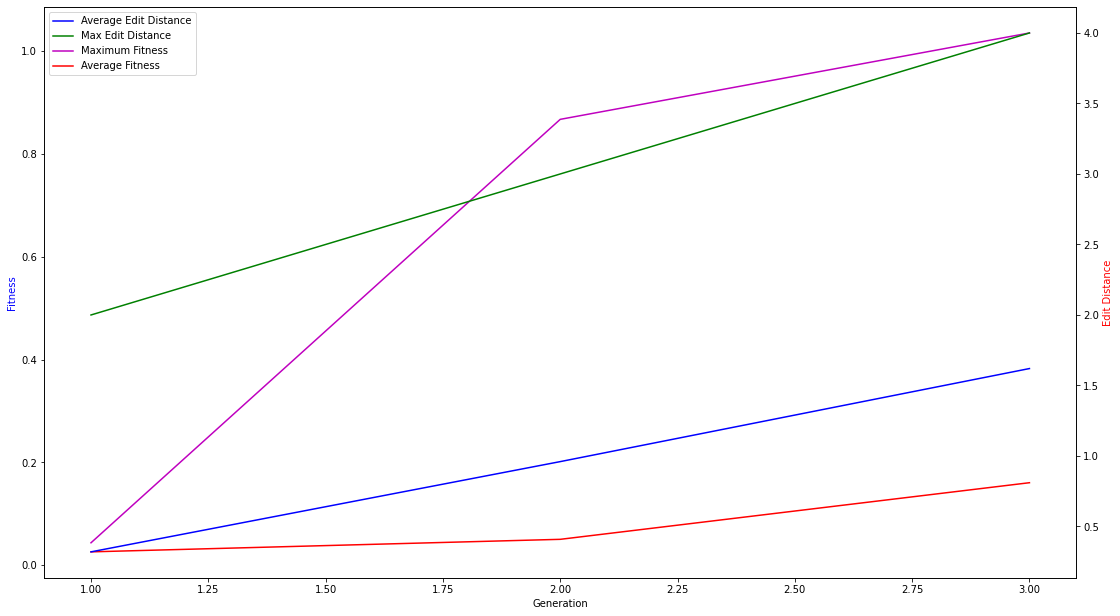

In [6]:
gen = logbook.select("gen")
# fit_mins = logbook.chapters["fitness"].select("min")
fit_avg = logbook.chapters["fitness"].select("avg")
fit_max = logbook.chapters["fitness"].select("max")
dist_avgs = logbook.chapters["distance"].select("avg")
dist_max = logbook.chapters["distance"].select("max")

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
fig.set_size_inches(18.5, 10.5)

# Plot size
ax2 = ax1.twinx()
line_dist_avg = ax2.plot(gen, dist_avgs, "b-", label="Average Edit Distance")
line_dist_max = ax2.plot(gen, dist_max, "g-", label="Max Edit Distance")
ax2.set_ylabel("Edit Distance", color="r")
# for tl in ax2.get_yticklabels():
#     tl.set_color("r")

# Plot fitness
line1 = ax1.plot(gen, fit_max, "m-", label="Maximum Fitness")
line2 = ax1.plot(gen, fit_avg, "r-", label="Average Fitness")
# line3 = ax1.plot(gen, fit_mins, "b-", label="Minimum Fitness")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="b")
# for tl in ax1.get_yticklabels():
#     tl.set_color("b")


lns = line_dist_avg + line_dist_max + line1 + line2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="upper left")

plt.show()

